In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


ImportError: Traceback (most recent call last):
  File "C:\Users\furqz\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 60, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The paging file is too small for this operation to complete.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,NaN,0.61,NaN,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,NaN
2,0.64,0.62,0.49,0.15,0.5,NaN,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,NaN,0.22
4,0.42,NaN,0.48,NaN,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,NaN,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,NaN,0.46,0.14,0.5,NaN,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,NaN,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	222
float64		column 3	185
float64		column 4	111
float64		column 5	74
float64		column 6	148
float64		column 7	185
float64		column 8	111


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1336.000000,1262.000000,1299.000000,1373.000000,1410.000000,1336.000000,1299.000000,1373.000000
mean,0.498638,0.499921,0.500508,0.258580,0.504965,0.008331,0.500462,0.274676
std,0.131984,0.117690,0.083674,0.134023,0.049592,0.079724,0.056188,0.102346
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.010000
25%,0.410000,0.422500,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.560000,0.550000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

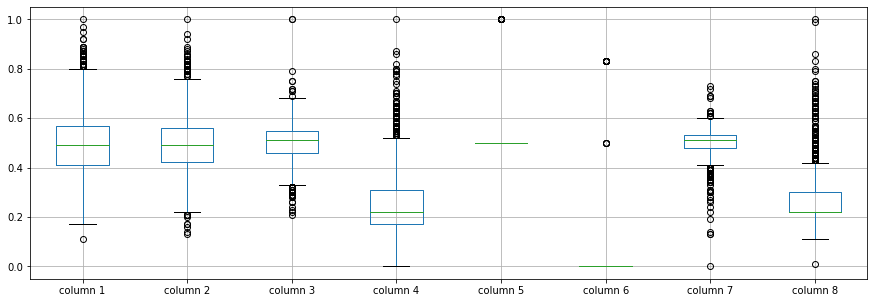

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.498638
column 2    0.499921
column 3    0.500508
column 4    0.258580
column 5    0.504965
column 6    0.008331
column 7    0.500462
column 8    0.274676
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.547541,-0.110153,0.162703,0.067364,0.014993,0.024559,-0.125154
column 2,0.547541,1.000000,-0.243691,0.139632,0.048552,0.003579,0.096385,-0.108349
column 3,-0.110153,-0.243691,1.000000,0.055596,-0.012985,0.011164,-0.166474,-0.015219
column 4,0.162703,0.139632,0.055596,1.000000,-0.012241,-0.009328,-0.117529,-0.049803
column 5,0.067364,0.048552,-0.012985,-0.012241,1.000000,-0.010588,0.051451,0.004711
column 6,0.014993,0.003579,0.011164,-0.009328,-0.010588,1.000000,0.023530,-0.051755
column 7,0.024559,0.096385,-0.166474,-0.117529,0.051451,0.023530,1.000000,0.073185
column 8,-0.125154,-0.108349,-0.015219,-0.049803,0.004711,-0.051755,0.073185,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+9,8+9+9,8+9+9+9,8+9+9+9+9,8+9+9+9+9+9,8+9+9+9+9+9+9,8+9+9+9+9+9,8+9+9+9+9,8+9+9+9,8+9+9,8+9,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.7514570096264714
Epoch: 1 , loss: 2.5459220020667366
Epoch: 2 , loss: 2.222570504831231
Epoch: 3 , loss: 2.034743070602417
Epoch: 4 , loss: 1.8848945796489716
Epoch: 5 , loss: 1.7831933744575665
Epoch: 6 , loss: 1.6813255470731985
Epoch: 7 , loss: 1.6216335205928138
Epoch: 8 , loss: 1.5382981727952543
Epoch: 9 , loss: 1.498718395181324
Epoch: 10 , loss: 1.444720850042675
Epoch: 11 , loss: 1.3931101910446002
Epoch: 12 , loss: 1.3660235385531965
Epoch: 13 , loss: 1.315753139231516
Epoch: 14 , loss: 1.3015415765669034
Epoch: 15 , loss: 1.276568741902061
Epoch: 16 , loss: 1.2434068374011829
Epoch: 17 , loss: 1.2162260231764421
Epoch: 18 , loss: 1.2063912192116613
Epoch: 19 , loss: 1.188880742891975
Epoch: 20 , loss: 1.177931797893151
Epoch: 21 , loss: 1.1792159333177235
Epoch: 22 , loss: 1.1633056700229645
Epoch: 23 , loss: 1.1485609716695289
Epoch: 24 , loss: 1.1320086361273476
Epoch: 25 , loss: 1.115527

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.463870
column 2    0.440000
column 3    0.480000
column 4    0.220000
column 5    0.500000
column 6    0.000000
column 7    0.463814
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,-0.175814,0.000000,-0.055955,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.060381
2,0.000000,0.000000,0.000000,0.000000,0.0,-0.000033,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.087912,0.000000
4,0.000000,0.126610,0.000000,-0.255636,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,-0.332863,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1480,0.000000,0.188796,0.000000,0.000000,0.0,0.000038,0.000000,0.000000
1481,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1482,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.041921,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.847248860826409, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.12466380141626396

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.490000
column 3    0.606143
column 4    0.299072
column 5    0.500000
column 6    0.000019
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.404186,0.610000,0.414045,0.130000,0.5,0.000000,0.480000,0.220000
1,0.430000,0.670000,0.480000,0.270000,0.5,0.000000,0.530000,0.280381
2,0.640000,0.620000,0.490000,0.150000,0.5,-0.000033,0.530000,0.220000
3,0.580000,0.440000,0.570000,0.130000,0.5,0.000000,0.452088,0.220000
4,0.420000,0.566610,0.480000,0.284364,0.5,0.000000,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.487137,0.630000,0.470000,0.180000,0.5,0.000000,0.500000,0.220000
1480,0.350000,0.478796,0.460000,0.140000,0.5,0.000038,0.540000,0.660000
1481,0.410000,0.470000,0.500000,0.140000,0.5,0.000000,0.530000,0.370000
1482,0.510000,0.450000,0.620000,0.250000,0.5,0.000000,0.548079,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NW_10(imp).xlsx", index=False, header=False)